In [23]:
require(ggplot2)
require(dplyr)
require(reshape2)

In [49]:
measles = read.csv('./data/MEASLES_Incidence_1928-2003_20151211140801.csv', skip=2)

In [25]:
dim(measles)

[1] 3952   53

In [26]:
head(measles[,1:20], 3)
head(measles[,21:40], 3)
head(measles[,41:53], 3)

,YEAR,WEEK,ALABAMA,ALASKA,ARIZONA,ARKANSAS,CALIFORNIA,COLORADO,CONNECTICUT,DELAWARE,DISTRICT.OF.COLUMBIA,FLORIDA,GEORGIA,HAWAII,IDAHO,ILLINOIS,INDIANA,IOWA,KANSAS,KENTUCKY
1,1928,1,3.67,-,1.90,4.11,1.38,8.38,4.50,8.58,-,0.21,1.17,-,-,0.50,1.34,0.16,0.81,3.08
2,1928,2,6.25,-,6.40,9.91,1.80,6.02,9.00,7.30,-,0.49,5.96,-,0.45,0.77,2.71,-,1.35,1.99
3,1928,3,7.95,-,4.50,11.15,1.31,2.86,8.81,15.88,-,0.42,-,-,0.45,0.61,1.71,-,1.41,5.26


,LOUISIANA,MAINE,MARYLAND,MASSACHUSETTS,MICHIGAN,MINNESOTA,MISSISSIPPI,MISSOURI,MONTANA,NEBRASKA,NEVADA,NEW.HAMPSHIRE,NEW.JERSEY,NEW.MEXICO,NEW.YORK,NORTH.CAROLINA,NORTH.DAKOTA,OHIO,OKLAHOMA,OREGON
1,1.89,4.52,10.87,25.66,5.68,0.31,-,1.19,0.18,1.60,-,-,3.55,14.90,7.60,47.86,-,2.51,4.86,4.91
2,3.00,7.40,15.47,28.50,7.59,0.23,-,0.83,0.18,0.29,-,-,4.74,11.06,9.65,119.70,0.15,-,2.56,4.91
3,2.33,6.78,21.43,34.76,9.39,0.15,-,1.69,0.74,0.36,-,-,6.68,14.90,8.54,110.90,1.20,4.86,6.27,3.63


,PENNSYLVANIA,RHODE.ISLAND,SOUTH.CAROLINA,SOUTH.DAKOTA,TENNESSEE,TEXAS,UTAH,VERMONT,VIRGINIA,WASHINGTON,WEST.VIRGINIA,WISCONSIN,WYOMING
1,6.97,1.18,42.04,5.69,22.03,1.18,0.40,0.28,-,14.83,3.36,1.54,0.91
2,8.74,0.74,83.90,6.57,16.96,0.63,-,0.56,-,17.34,4.19,0.96,-
3,8.12,2.65,77.46,2.04,24.66,0.62,0.20,1.12,-,15.67,4.19,4.79,1.36


In [27]:
measles = melt(measles, id.var = c("YEAR", "WEEK"))

Warning message:
: attributes are not identical across measure variables; they will be dropped

In [29]:
dim(measles); head(measles)

[1] 201552      4

,YEAR,WEEK,variable,value
1,1928,1,ALABAMA,3.67
2,1928,2,ALABAMA,6.25
3,1928,3,ALABAMA,7.95
4,1928,4,ALABAMA,12.58
5,1928,5,ALABAMA,8.03
6,1928,6,ALABAMA,7.27


In [30]:
colnames(measles) = c("year", "week", "state", "cases"); str(measles)

'data.frame':	201552 obs. of  4 variables:
 $ year : int  1928 1928 1928 1928 1928 1928 1928 1928 1928 1928 ...
 $ week : int  1 2 3 4 5 6 7 8 9 10 ...
 $ state: Factor w/ 51 levels "ALABAMA","ALASKA",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ cases: chr  "3.67" "6.25" "7.95" "12.58" ...


In [31]:
measles$cases = as.numeric(measles$cases)

Warning message:
In eval(expr, envir, enclos): NAs introduced by coercion

In [33]:
str(measles)

'data.frame':	201552 obs. of  4 variables:
 $ year : int  1928 1928 1928 1928 1928 1928 1928 1928 1928 1928 ...
 $ week : int  1 2 3 4 5 6 7 8 9 10 ...
 $ state: Factor w/ 51 levels "ALABAMA","ALASKA",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ cases: num  3.67 6.25 7.95 12.58 8.03 ...


In [34]:
head(measles)

,year,week,state,cases
1,1928,1,ALABAMA,3.67
2,1928,2,ALABAMA,6.25
3,1928,3,ALABAMA,7.95
4,1928,4,ALABAMA,12.58
5,1928,5,ALABAMA,8.03
6,1928,6,ALABAMA,7.27


#### Add up all the weeks

In [35]:
mdf = measles %>%
    group_by(state, year) %>%
    summarise(c = if(all(is.na(cases)))  NA else sum(cases, na.rm = T))

In [36]:
mdf$state = factor(mdf$state, levels = rev(levels(mdf$state)))

In [38]:
# ?rev - reverse elements

In [39]:
dim(mdf); head(mdf)

[1] 3876    3

,state,year,c
1,ALABAMA,1928,334.99
2,ALABAMA,1929,111.93
3,ALABAMA,1930,157
4,ALABAMA,1931,337.29
5,ALABAMA,1932,10.21
6,ALABAMA,1933,65.22


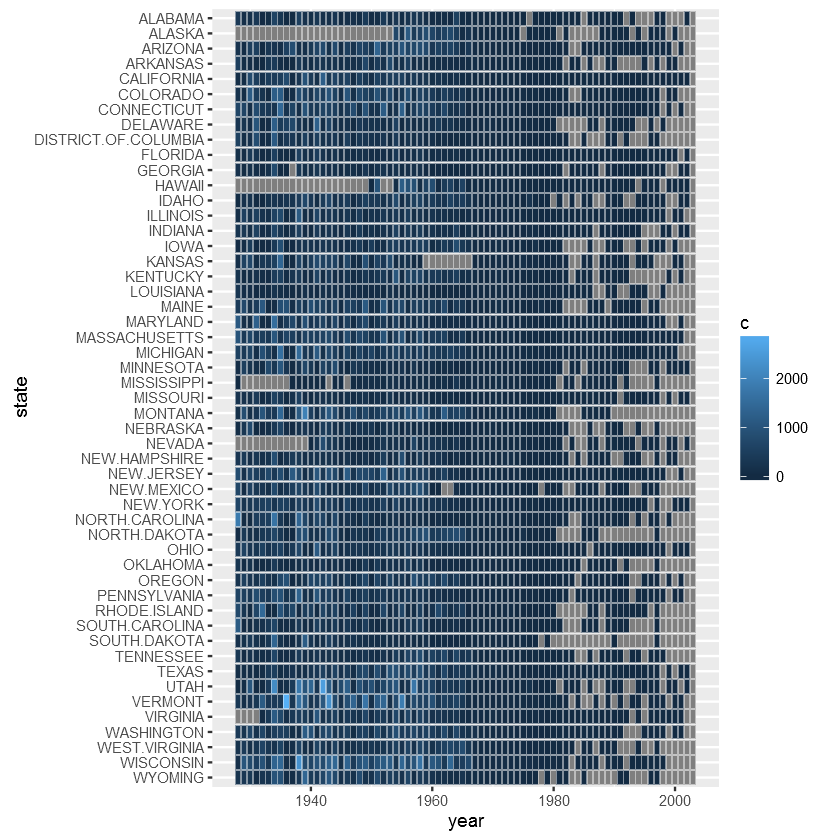

In [41]:
ggplot(mdf, aes(y=state, x=year, fill=c)) + 
  geom_tile(colour="white", width=.9, height=.9)

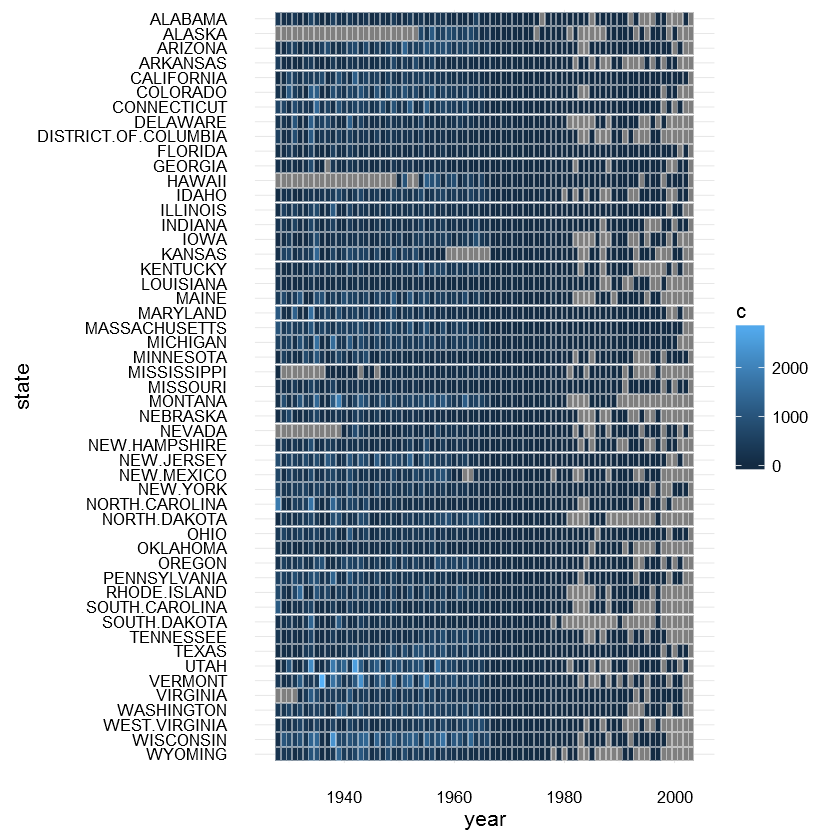

In [42]:
ggplot(mdf, aes(y=state, x=year, fill=c)) + 
  geom_tile(colour="white", width=.9, height=.9) +
  theme_minimal()

#### Motivation

![](r'.../../../images/measles_incidence_heatmap_24.png')

References 

https://benjaminlmoore.wordpress.com/2015/04/09/recreating-the-vaccination-heatmaps-in-r/
http://dadaviz.com/i/3210


